In [286]:
import pandas as pd
import numpy as np
import seaborn as sns


In [269]:
import matplotlib.pyplot as plt

In [270]:
df=pd.read_csv('HRDataset_v14.csv')
# Date Cleaning was done in excel
# Date of hire, date of termination and last review date in the dataset did not have proper formatting
# The data in the format DD/MM/YYY was converted into proper date format by converting text-to-columns using / separator. Then Date formula (=DATE(YEAR,MONTH,DATE)) was used to enter the corrected date format
# The department name in the dataset was not trimmed and it is later trimmed using TRIM() Function.
# Later these dates are used to calculate the number of days,months worked in the organisation and some invalid dates of termination are taken as 'Wrong date of termination'



In [271]:
df.head()

,Employee_Name,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,Salary,...,ManagerID,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,Last_Performance_review date corrected,DaysLateLast30,Absences,Absent percentage per days worked
0,"Adinolfi, Wilson K",10026,0,0,1,1,5,4,0,62506,...,22.0,LinkedIn,Exceeds,4.60,5,0,01-05-2020,0,1,NaN
1,"Ait Sidi, Karthikeyan",10084,1,1,1,5,3,3,0,104437,...,4.0,Indeed,Fully Meets,4.96,3,6,02-12-2017,0,17,NaN
2,"Akinkuolie, Sarah",10196,1,1,0,5,5,3,0,64955,...,20.0,LinkedIn,Fully Meets,3.02,3,0,05-03-2013,0,3,0.317%
3,"Alagbe,Trina",10088,1,1,0,1,5,3,0,64991,...,16.0,Indeed,Fully Meets,4.84,5,0,01-03-2019,0,15,NaN
4,"Anderson, Carol",10069,0,2,0,5,5,3,0,50825,...,39.0,Google Search,Fully Meets,5.00,4,0,02-01-2016,0,2,0.119%


In [272]:
print(df.columns)

Index(['Employee_Name', 'EmpID', 'MarriedID', 'MaritalStatusID', 'GenderID',
       'EmpStatusID', 'DeptID', 'PerfScoreID', 'FromDiversityJobFairID',
       'Salary', 'Termd', 'PositionID', 'Position', 'State', 'Zip',
       'DOB corrected', 'Sex', 'MaritalDesc', 'CitizenDesc', 'HispanicLatino',
       'RaceDesc', 'Date of Hire Corrected', 'Date Of termination Corrected',
       'Months Worked', 'Days Worked', 'TermReason', 'EmploymentStatus',
       'Department Trimmed', 'ManagerName', 'ManagerID', 'RecruitmentSource',
       'PerformanceScore', 'EngagementSurvey', 'EmpSatisfaction',
       'SpecialProjectsCount', 'Last_Performance_review date corrected',
       'DaysLateLast30', 'Absences', 'Absent percentage per days worked'],
      dtype='object')


In [273]:
df['Department Trimmed'].unique()

array(['Production', 'IT/IS', 'Software Engineering', 'Admin Offices',
       'Sales', 'Executive Office'], dtype=object)

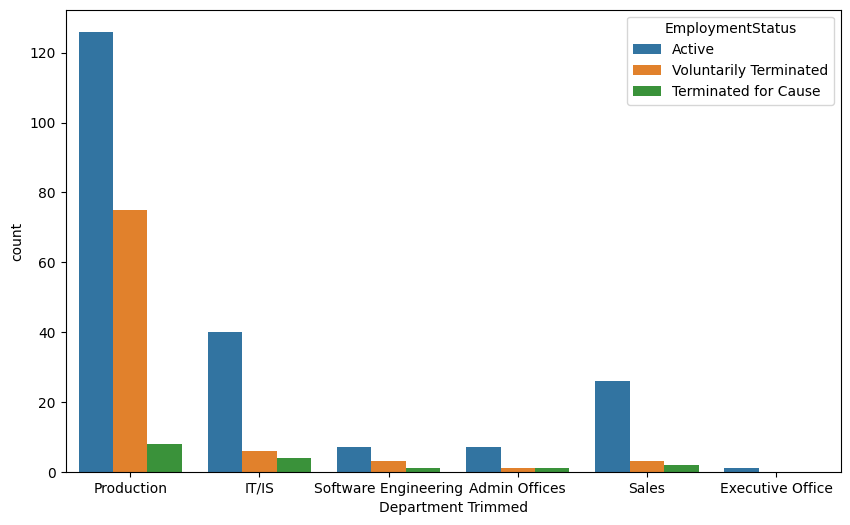

In [274]:
#This visualisation shows the approximate comparison of number of employees present vs employee Voluntary termination choice departmentwise
#It can be seen that in Production department, Voluntary terminated employee percentage per available employees is higher compared to other departments
plt.figure(figsize=(10,6))
sns.countplot(x=df['Department Trimmed'],hue="EmploymentStatus",data=df)
plt.show()

In [275]:
df['Days Worked'].unique()

array(['Still working', 'Wrong date of termination', '947', '1676',
       '2253', '1982', '1273', '1679', '520', '916', '792', '761', '702',
       '1101', '452', '246', '2194', '1584', '1468', '2255', '2956',
       '1706', '821', '2125', '975', '881', '1155', '2070', '306', '1798',
       '487', '790', '1288', '979', '118', '124', '463', '3220', '1556',
       '1607', '786', '569', '1533', '1098', '759', '2340', '3200',
       '1310', '1888', '793', '1742', '762', '419', '1827', '551', '518',
       '1248', '1459', '723', '2750', '1768', '1741', '362', '1973',
       '1131', '2192', '179', '1283', '1971', '1791', '453', '2315',
       '2043', '1259', '2836', '952', '4055', '801', '1636', '699',
       '1217', '672', '1950', '1829', '1249', '581', '1736', '860',
       '1210', '913', '1270', '731', '1251', '1190', '493', '1647',
       '1524', '3377'], dtype=object)

In [276]:
#Creating a new data frame containing the number of days worked by the voluntarilty terminated employees
df_correct_worked_yrs=df[(df['EmploymentStatus']=='Voluntarily Terminated') & (df['Days Worked']!='Wrong date of termination')]
df_correct_worked_yrs['Days Worked']=pd.to_numeric(df_correct_worked_yrs['Days Worked'],errors='coerce')


C:\Users\HP\AppData\Local\Temp\ipykernel_23308\1210031256.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_correct_worked_yrs['Days Worked']=pd.to_numeric(df_correct_worked_yrs['Days Worked'],errors='coerce')


In [277]:
df_correct_worked_yrs['Department Trimmed'] = df_correct_worked_yrs['Department Trimmed'].astype('category')



C:\Users\HP\AppData\Local\Temp\ipykernel_23308\4260929564.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_correct_worked_yrs['Department Trimmed'] = df_correct_worked_yrs['Department Trimmed'].astype('category')


<Figure size 6000x1500 with 0 Axes>

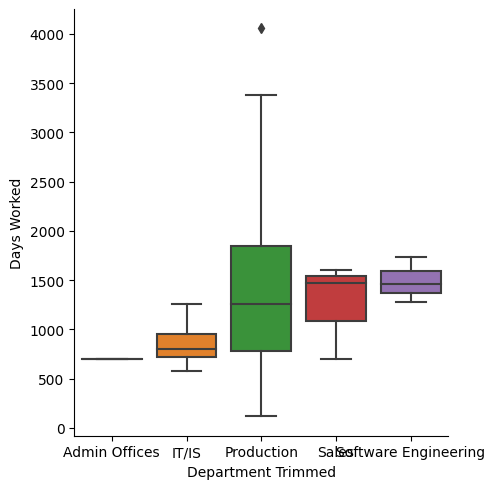

In [278]:
plt.figure(figsize=(60,15))
sns.catplot(x='Department Trimmed',y='Days Worked',data=df_correct_worked_yrs,kind='box')
plt.show()
# This plot shows the number of days voluntarily terminated employees worked before parting from company-- department-wise
# To improve the retention rate, it is to be ensured that employees within this period of time gets to meet their needs. To know the most probable reasons for termination, we need to get the distibution of the termination reasons. 

In [279]:
df_correct_worked_yrs['TermReason']=df_correct_worked_yrs['TermReason'].astype('category')

C:\Users\HP\AppData\Local\Temp\ipykernel_23308\3355085628.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_correct_worked_yrs['TermReason']=df_correct_worked_yrs['TermReason'].astype('category')


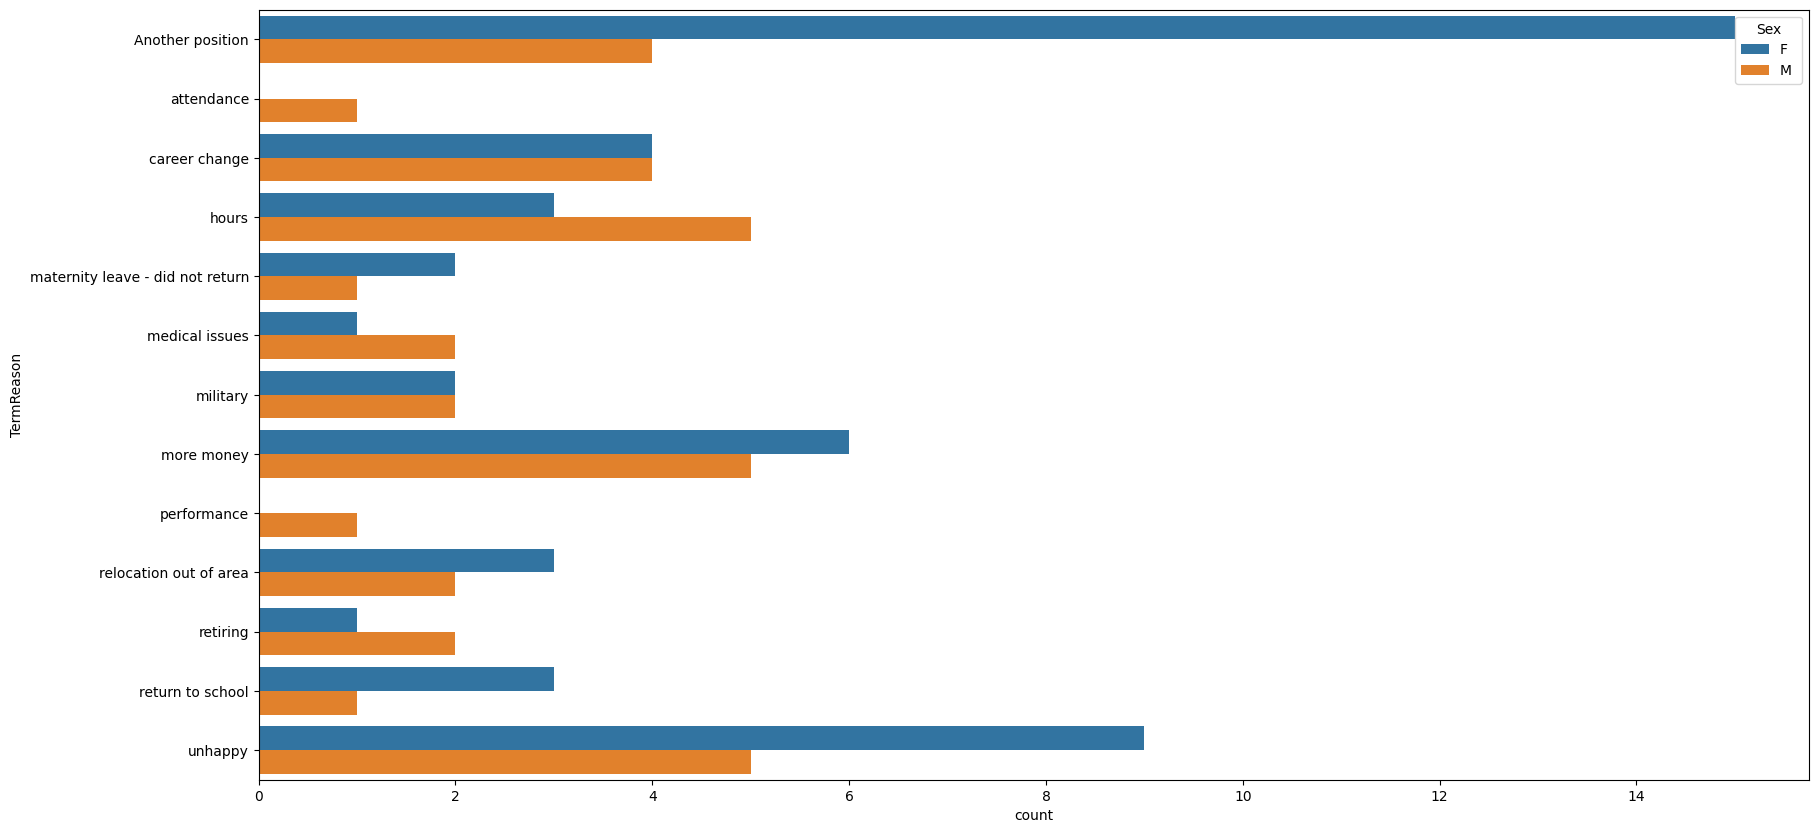

In [280]:
plt.figure(figsize=(20,10))
sns.countplot(y='TermReason',hue="Sex",data=df_correct_worked_yrs)
plt.show()
# This visualisation shows the reasonwise breakup for the termination - For male and female
# It can be inferred that the Majority of employees in Female category are looking for other position 
# Majority in males are voluntarily leaving the job due to Unhappiness, More money, Working hours which may be linked to Work-life balance issues.

In [281]:
df_production_term=df_correct_worked_yrs[df_correct_worked_yrs['Department Trimmed']=='Production']

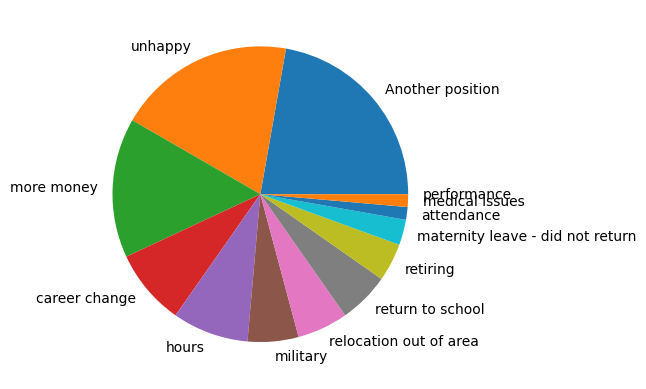

In [282]:
count_production=df_production_term['TermReason'].value_counts()
plt.pie(count_production,labels=count_production.index)
plt.show()
# This visualisation shows the breakup of the termination reasons in the department with high percentage of termination i.e, production

In [283]:
df['PerformanceScore']=df['PerformanceScore'].astype('category')

In [284]:
categorical_avg=df.groupby('PerformanceScore')['EmpSatisfaction'].mean()
categorical_avg

PerformanceScore
Exceeds              4.108108
Fully Meets          3.950617
Needs Improvement    3.611111
PIP                  2.538462
Name: EmpSatisfaction, dtype: float64

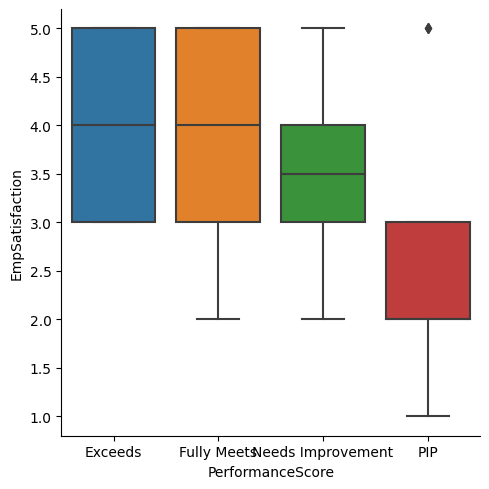

In [285]:
sns.catplot(x='PerformanceScore',y='EmpSatisfaction',data=df,kind='box')
#This shows that EmpSatisfaction is higher if given higher performanceScore